In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import sys

In [4]:
sys.path.insert(1, "../python")
sys.path.insert(1, "../..")
import util
import kde

In [5]:
plt.style.use("seaborn-ticks")
sns.set_palette("colorblind")

In [6]:
import pyemma

# Load PLUMED data 

In [15]:
path = "../suppl-runs/smd/"
sbs = np.empty((21, 100, 2))
for i in range(21):
    f = glob.glob(f"{path}{i}/*.txt")[0]
    cvs = np.loadtxt(f)
    cvs.shape
    sbs[i, :, :] = cvs[:, 1:3]

In [65]:
cvs

array([[0.0000000e+00, 5.8756800e-01, 1.0797550e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+01, 5.8393900e-01, 1.1213250e+00, ..., 9.9228000e-02,
        2.5000000e+01, 1.2310100e-01],
       [2.0000000e+01, 5.9108400e-01, 9.9125700e-01, ..., 1.8909400e-01,
        5.0000000e+01, 2.3895400e-01],
       ...,
       [9.7000000e+02, 6.4193600e-01, 1.2132070e+00, ..., 4.6983400e-01,
        1.0000000e+03, 2.5358039e+01],
       [9.8000000e+02, 6.9521700e-01, 1.2785440e+00, ..., 6.7191400e-01,
        1.0000000e+03, 2.6218842e+01],
       [9.9000000e+02, 7.3399000e-01, 1.1957110e+00, ..., 9.2244000e-01,
        1.0000000e+03, 2.7074276e+01]])

In [16]:
sbs.shape

(21, 100, 2)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


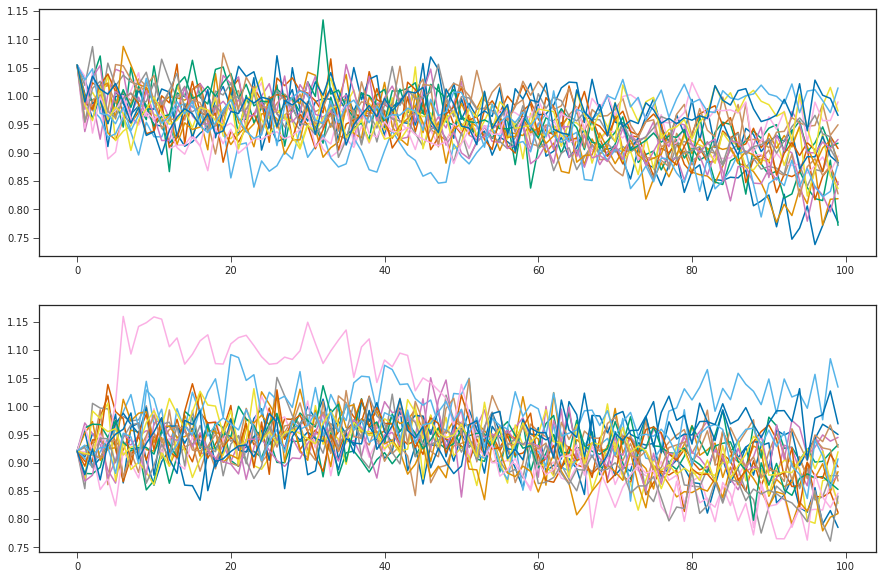

In [18]:
f = plt.figure(figsize=(15, 10))
ax0 = f.add_subplot(2, 1, 1)
ax1 = f.add_subplot(2, 1, 2)
for arr in sbs:
    ax0.plot(arr[:, 0])
    ax1.plot(arr[:, 1])
ax0.legend()
ax1.legend()

In [19]:
# points to seed for SMD/more simulations
points = []
for i in np.arange(0.6, 1.05, 0.1):
    points.append((i, 1.0))
for i in np.arange(0.6, 1.05, 0.1):
    for j in np.arange(0.8, 1.0, 0.1):
        points.append((i, j))
for i in np.arange(0.8, 1.05, 0.1):
    for j in np.arange(0.6, 0.8, 0.1):
        points.append((i, j))

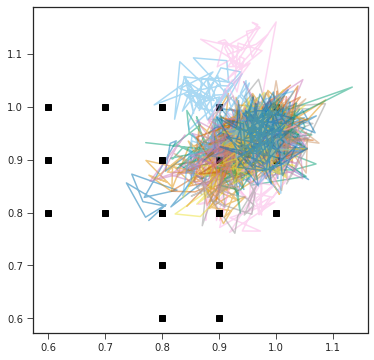

In [21]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(points, sbs):
    ax.plot(x, y, "sk")
    ax.plot(arr[:, 0], arr[:, 1], alpha=0.5)

# Load other SMD runs 

In [22]:
path = "../suppl-runs/smd-2/"
sbs_2 = np.empty((16, 100, 2))
for i in range(16):
    f = glob.glob(f"{path}{i}/*.txt")[0]
    cvs = np.loadtxt(f)
    cvs.shape
    sbs_2[i, :, :] = cvs[:, 1:3]

In [23]:
sbs_2.shape

(16, 100, 2)

In [26]:
new_points = []
for i in np.arange(0.55, 0.95, 0.1):
    for j in np.arange(1.0, 1.4, 0.1):
        new_points.append((i, j))
print(len(new_points))

16


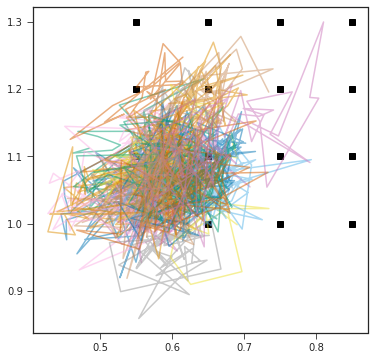

In [27]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(new_points, sbs_2):
    ax.plot(x, y, "sk")
    ax.plot(arr[:, 0], arr[:, 1], alpha=0.5)

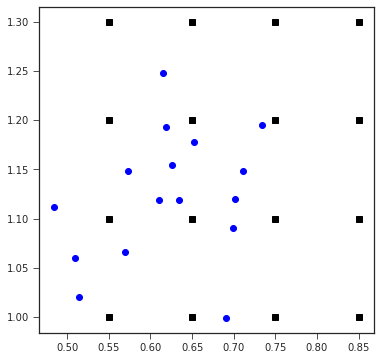

In [29]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(new_points, sbs_2):
    ax.plot(x, y, "sk")
    ax.plot(arr[-1, 0], arr[-1, 1], "ob")

# PyEMMA features 

In [30]:
feat2 = pyemma.coordinates.featurizer("../models/Initial-models/civsd-down-minus.pdb")
r_ca = feat2.select("resid 111 117 120 123 126 and name CA")
r_cz = feat2.select("resid 111 117 120 123 126 and name CZ")
d_ca = feat2.select("resid 23 30 45 58 77 80 and name CA")
d_cg = feat2.select(
    "(resid 23 30 45 58 80 and name CG) or (protein and resid 77 and name CD)"
)
feat2.add_distances(r_ca, indices2=d_ca)
feat2.add_distances(r_cz, indices2=d_cg)

10-06-21 14:40:07 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  The 1D arrays input for add_distances() have been sorted, and index duplicates have been eliminated.
Check the output of describe() to see the actual order of the features
10-06-21 14:40:07 pyemma.coordinates.data.featurization.featurizer.MDFeaturizer[0] WARNING  The 1D arrays input for add_distances() have been sorted, and index duplicates have been eliminated.
Check the output of describe() to see the actual order of the features


/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/project2/roux/scguo/anaconda/envs/py37/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:198: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)


In [31]:
feat2.describe()

['DIST: ARG 217 CA 1768 0 - ASP 129 CA 406 0',
 'DIST: ARG 217 CA 1768 0 - ASP 136 CA 530 0',
 'DIST: ARG 217 CA 1768 0 - ASP 151 CA 751 0',
 'DIST: ARG 217 CA 1768 0 - ASP 164 CA 944 0',
 'DIST: ARG 217 CA 1768 0 - GLU 183 CA 1258 0',
 'DIST: ARG 217 CA 1768 0 - ASP 186 CA 1299 0',
 'DIST: ARG 223 CA 1872 0 - ASP 129 CA 406 0',
 'DIST: ARG 223 CA 1872 0 - ASP 136 CA 530 0',
 'DIST: ARG 223 CA 1872 0 - ASP 151 CA 751 0',
 'DIST: ARG 223 CA 1872 0 - ASP 164 CA 944 0',
 'DIST: ARG 223 CA 1872 0 - GLU 183 CA 1258 0',
 'DIST: ARG 223 CA 1872 0 - ASP 186 CA 1299 0',
 'DIST: ARG 226 CA 1934 0 - ASP 129 CA 406 0',
 'DIST: ARG 226 CA 1934 0 - ASP 136 CA 530 0',
 'DIST: ARG 226 CA 1934 0 - ASP 151 CA 751 0',
 'DIST: ARG 226 CA 1934 0 - ASP 164 CA 944 0',
 'DIST: ARG 226 CA 1934 0 - GLU 183 CA 1258 0',
 'DIST: ARG 226 CA 1934 0 - ASP 186 CA 1299 0',
 'DIST: ARG 229 CA 1990 0 - ASP 129 CA 406 0',
 'DIST: ARG 229 CA 1990 0 - ASP 136 CA 530 0',
 'DIST: ARG 229 CA 1990 0 - ASP 151 CA 751 0',
 'DIST:

In [32]:
len(feat2.describe())

60

In [37]:
ncs = []
for i in range(21):
    ncs.append(f"../suppl-runs/smd/{i}/{i}.nc")
print(ncs)

['../suppl-runs/smd/0/0.nc', '../suppl-runs/smd/1/1.nc', '../suppl-runs/smd/2/2.nc', '../suppl-runs/smd/3/3.nc', '../suppl-runs/smd/4/4.nc', '../suppl-runs/smd/5/5.nc', '../suppl-runs/smd/6/6.nc', '../suppl-runs/smd/7/7.nc', '../suppl-runs/smd/8/8.nc', '../suppl-runs/smd/9/9.nc', '../suppl-runs/smd/10/10.nc', '../suppl-runs/smd/11/11.nc', '../suppl-runs/smd/12/12.nc', '../suppl-runs/smd/13/13.nc', '../suppl-runs/smd/14/14.nc', '../suppl-runs/smd/15/15.nc', '../suppl-runs/smd/16/16.nc', '../suppl-runs/smd/17/17.nc', '../suppl-runs/smd/18/18.nc', '../suppl-runs/smd/19/19.nc', '../suppl-runs/smd/20/20.nc']


In [38]:
feat_raw = pyemma.coordinates.load(ncs, features=feat2, chunksize=32)

In [40]:
len(feat_raw)

21

In [41]:
feat_raw[0].shape

(100, 60)

In [79]:
# useful salt bridges
# R226-D129, R229-D129, R226-D186, R229-D186
sb_ids = [42, 48, 47, 53]

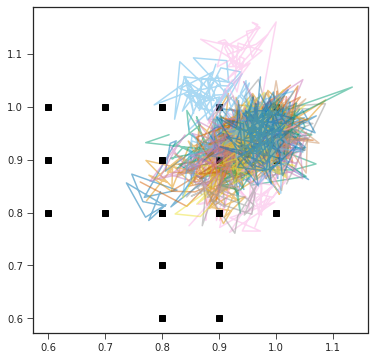

In [80]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(points, feat_raw):
    ax.plot(x, y, "sk")
    ax.plot(arr[:, sb_ids[1]], arr[:, sb_ids[2]], alpha=0.5)

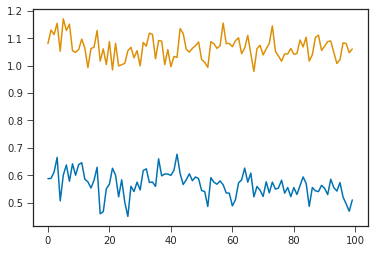

In [46]:
plt.plot(sbs_2[1, :, 0])
plt.plot(sbs_2[1, :, 1])

In [47]:
print(sbs_2[1, -10:, 0])

[0.552107 0.529267 0.585409 0.5546   0.54221  0.573238 0.520223 0.495678
 0.468632 0.509837]


In [51]:
ncs_2 = []
for i in range(16):
    ncs_2.append(f"../suppl-runs/smd-2/{i}/{i}.nc")
print(ncs_2)

['../suppl-runs/smd-2/0/0.nc', '../suppl-runs/smd-2/1/1.nc', '../suppl-runs/smd-2/2/2.nc', '../suppl-runs/smd-2/3/3.nc', '../suppl-runs/smd-2/4/4.nc', '../suppl-runs/smd-2/5/5.nc', '../suppl-runs/smd-2/6/6.nc', '../suppl-runs/smd-2/7/7.nc', '../suppl-runs/smd-2/8/8.nc', '../suppl-runs/smd-2/9/9.nc', '../suppl-runs/smd-2/10/10.nc', '../suppl-runs/smd-2/11/11.nc', '../suppl-runs/smd-2/12/12.nc', '../suppl-runs/smd-2/13/13.nc', '../suppl-runs/smd-2/14/14.nc', '../suppl-runs/smd-2/15/15.nc']


In [52]:
feat_raw_2 = pyemma.coordinates.load(ncs_2, features=feat2, chunksize=32)

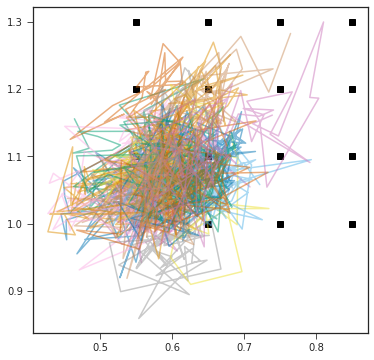

In [81]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(new_points, feat_raw_2):
    ax.plot(x, y, "sk")
    ax.plot(arr[:, sb_ids[0]], arr[:, sb_ids[1]], alpha=0.5)

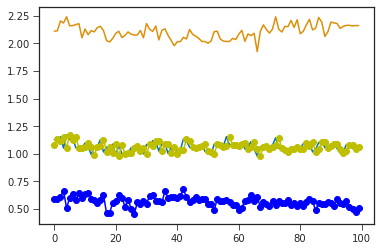

In [60]:
plt.plot(feat_raw_2[1][:, sb_ids[0]])
plt.plot(feat_raw_2[1][:, sb_ids[1]])
# plt.plot(feat_raw_2[1][:, 17])
plt.plot(sbs_2[1, :, 0], "bo-")
plt.plot(sbs_2[1, :, 1], "yo-")

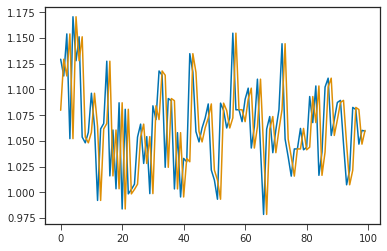

In [61]:
plt.plot(feat_raw_2[1][:, sb_ids[0]])  # supposedly R
plt.plot(sbs_2[1, :, 1])  # R229- D129

In [64]:
feat2.describe()[sb_ids[1]]

'DIST: ARG 232 CZ 2056 0 - ASP 129 CG 411 0'

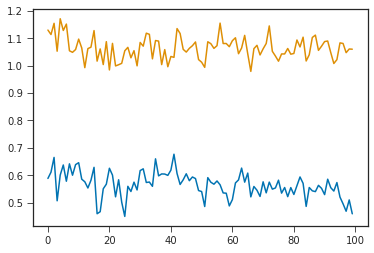

In [78]:
plt.plot(feat_raw_2[1][:, 42])
plt.plot(feat_raw_2[1][:, 48])

In [76]:
feat2.active_features

[['DIST: ARG 217 CA 1768 0 - ASP 129 CA 406 0', 'DIST: ARG 217 CA 1768 0 - ASP 136 CA 530 0', 'DIST: ARG 217 CA 1768 0 - ASP 151 CA 751 0', 'DIST: ARG 217 CA 1768 0 - ASP 164 CA 944 0', 'DIST: ARG 217 CA 1768 0 - GLU 183 CA 1258 0', 'DIST: ARG 217 CA 1768 0 - ASP 186 CA 1299 0', 'DIST: ARG 223 CA 1872 0 - ASP 129 CA 406 0', 'DIST: ARG 223 CA 1872 0 - ASP 136 CA 530 0', 'DIST: ARG 223 CA 1872 0 - ASP 151 CA 751 0', 'DIST: ARG 223 CA 1872 0 - ASP 164 CA 944 0', 'DIST: ARG 223 CA 1872 0 - GLU 183 CA 1258 0', 'DIST: ARG 223 CA 1872 0 - ASP 186 CA 1299 0', 'DIST: ARG 226 CA 1934 0 - ASP 129 CA 406 0', 'DIST: ARG 226 CA 1934 0 - ASP 136 CA 530 0', 'DIST: ARG 226 CA 1934 0 - ASP 151 CA 751 0', 'DIST: ARG 226 CA 1934 0 - ASP 164 CA 944 0', 'DIST: ARG 226 CA 1934 0 - GLU 183 CA 1258 0', 'DIST: ARG 226 CA 1934 0 - ASP 186 CA 1299 0', 'DIST: ARG 229 CA 1990 0 - ASP 129 CA 406 0', 'DIST: ARG 229 CA 1990 0 - ASP 136 CA 530 0', 'DIST: ARG 229 CA 1990 0 - ASP 151 CA 751 0', 'DIST: ARG 229 CA 1990 0 -

In [77]:
feat2.topology

<mdtraj.Topology with 10 chains, 10692 residues, 56582 atoms, 22898 bonds at 0x7f0c8bf31dd0>

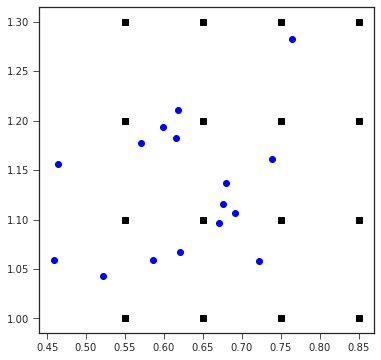

In [83]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(new_points, feat_raw_2):
    ax.plot(x, y, "sk")
    ax.plot(arr[-1, sb_ids[0]], arr[-1, sb_ids[1]], "ob")

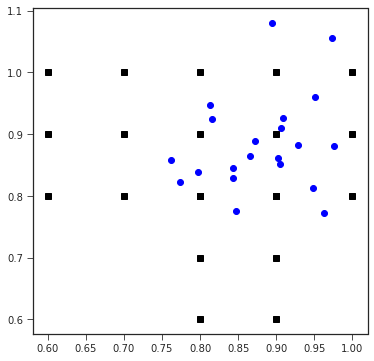

In [85]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(points, feat_raw):
    ax.plot(x, y, "sk")
    ax.plot(arr[-1, sb_ids[1]], arr[-1, sb_ids[2]], "ob")

0: 73
1: 86
2: 88
3: 91
4: 40
5: 9
6: 3
7: 89
8: 95
9: 80
10: 94
11: 92
12: 97
13: 66
14: 94
15: 99


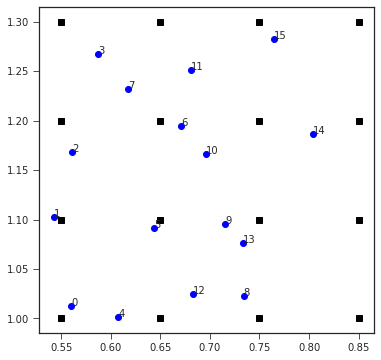

In [97]:
# closest point during simulation
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for i, (x, y), arr in zip(range(16), new_points, feat_raw_2):
    ax.plot(x, y, "sk")
    dist = (arr[:, sb_ids[0]] - x) ** 2 + (arr[:, sb_ids[1]] - y) ** 2
    idx = np.argsort(dist)[0]
    ax.plot(arr[idx, sb_ids[0]], arr[idx, sb_ids[1]], "ob")
    ax.annotate(i, (arr[idx, sb_ids[0]], arr[idx, sb_ids[1]]))
    print(f"{i}: {idx}")

In [87]:
print(new_points)

[(0.55, 1.0), (0.55, 1.1), (0.55, 1.2000000000000002), (0.55, 1.3000000000000003), (0.65, 1.0), (0.65, 1.1), (0.65, 1.2000000000000002), (0.65, 1.3000000000000003), (0.75, 1.0), (0.75, 1.1), (0.75, 1.2000000000000002), (0.75, 1.3000000000000003), (0.85, 1.0), (0.85, 1.1), (0.85, 1.2000000000000002), (0.85, 1.3000000000000003)]


15: 74
15: 87
15: 89
15: 92
15: 41
15: 10
15: 4
15: 90
15: 96
15: 81
15: 95
15: 93
15: 98
15: 67
15: 95
15: 92


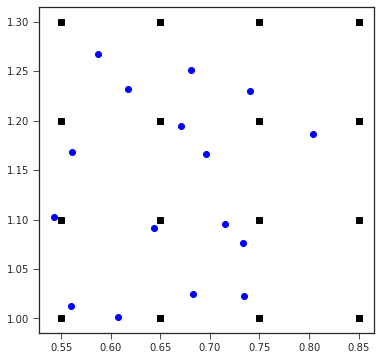

In [89]:
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for (x, y), arr in zip(new_points, sbs_2):
    ax.plot(x, y, "sk")
    dist = (arr[:, 0] - x) ** 2 + (arr[:, 1] - y) ** 2
    idx = np.argsort(dist)[0]
    ax.plot(arr[idx, 0], arr[idx, 1], "ob")
    print(f"{i}: {idx}")

0: 92
1: 96
2: 83
3: 24
4: 39
5: 98
6: 97
7: 99
8: 99
9: 71
10: 93
11: 92
12: 85
13: 82
14: 4
15: 88
16: 87
17: 83
18: 75
19: 97
20: 16


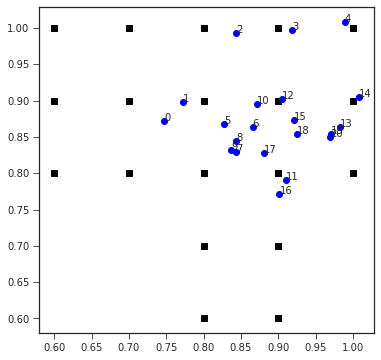

In [96]:
# closest point during simulation
f = plt.figure(figsize=(6, 6))
ax = f.add_subplot(111)
for i, (x, y), arr in zip(range(21), points, feat_raw):
    ax.plot(x, y, "sk")
    dist = (arr[:, sb_ids[1]] - x) ** 2 + (arr[:, sb_ids[2]] - y) ** 2
    idx = np.argsort(dist)[0]
    ax.plot(arr[idx, sb_ids[1]], arr[idx, sb_ids[2]], "ob")
    ax.annotate(i, (arr[idx, sb_ids[1]], arr[idx, sb_ids[2]]))
    print(f"{i}: {idx}")